<a href="https://colab.research.google.com/github/BossDevinator/IS_4482/blob/main/A5_Devan_Moore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A5: REGRESSION EDA, MODELING

##CHUNK 1:
###Import and EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/NA_sales_filtered.csv', encoding = 'latin1')

###Understanding Data

In [3]:
df.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,69.819385,28.966745,70.765485,152.730969,0.354230
std,13.945811,19.098594,14.438432,545.962483,0.494404
min,13.000000,3.000000,5.000000,4.000000,0.010000
25%,61.000000,14.000000,64.000000,10.000000,0.080000
50%,72.000000,25.000000,74.000000,24.000000,0.170000
75%,80.000000,40.000000,81.000000,77.000000,0.410000
max,98.000000,113.000000,95.000000,10665.000000,3.490000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [5]:
df.shape

(6345, 9)

In [6]:
df.head(10)

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27
5,Medal of Honor: Frontline,PS2,Shooter,T,88,29,84,135,2.93
6,Uncharted 3: Drake's Deception,PS3,Action,T,92,97,82,3712,2.77
7,Uncharted 2: Among Thieves,PS3,Action,T,96,105,87,5187,3.27
8,World of Warcraft,PC,Role-Playing,T,93,57,72,2182,0.08
9,Driver,PS,Action,T,87,22,80,78,3.11


In [7]:
df.columns

Index(['Name', 'Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'NA_Sales'],
      dtype='object')

In [8]:
df = df[['Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'NA_Sales']]

The column I have chosen to remove is 'Name'. This is because in terms of generalization, the data retrieved from this column is not substantial to helping us better understand the target variable. While being able to analyze the data it make modeling extremely difficult as the names cannot be categorized.

#CHUNK 2:
###EDA and Correlation

###Pairplot

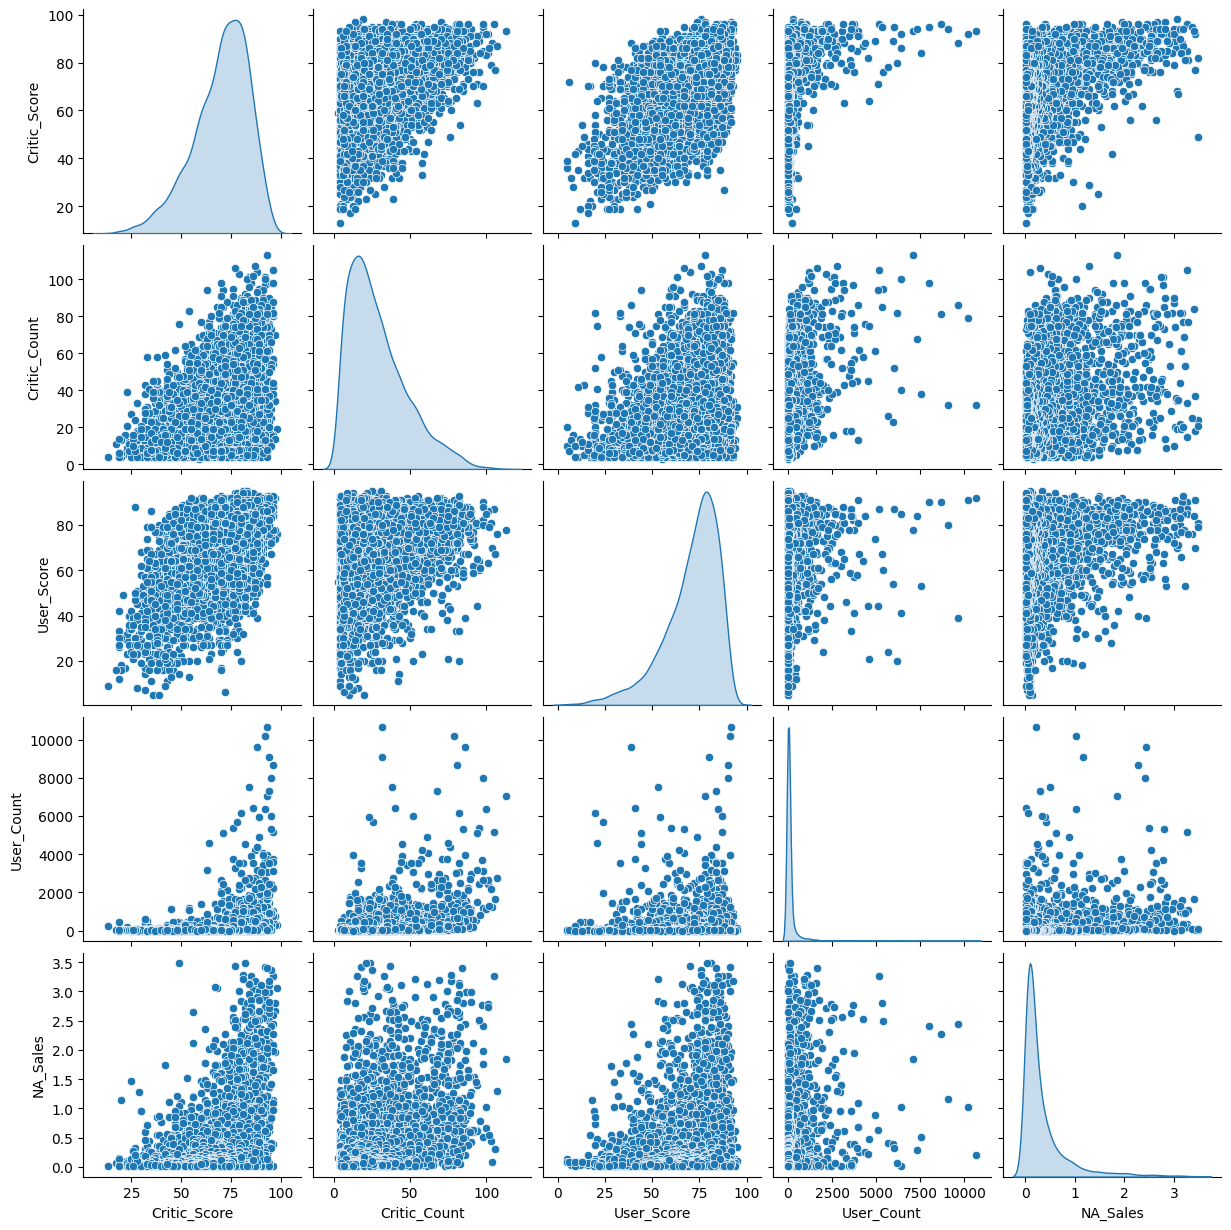

In [9]:
sns.pairplot(df, diag_kind='kde')

###Heatmap

In [10]:
cor = df.corr(numeric_only=True)

[]

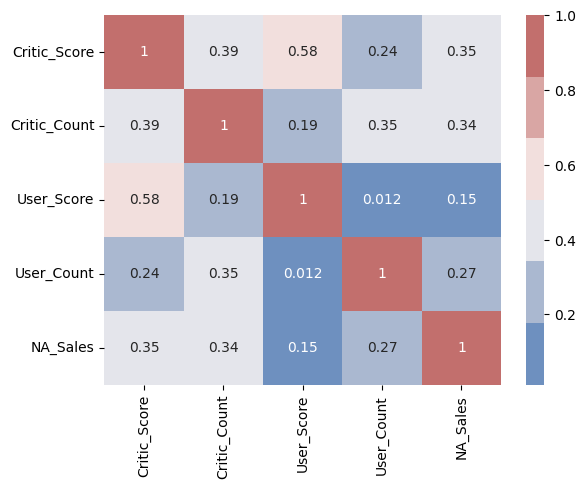

In [11]:
sns.heatmap(cor,
            annot=True,
            cmap=sns.color_palette("vlag"),
            xticklabels=cor.columns,
            yticklabels=cor.columns)
plt.plot()

In [12]:
cor['NA_Sales'].sort_values(ascending=False)

,NA_Sales
NA_Sales,1.000000
Critic_Score,0.352974
Critic_Count,0.343505
User_Count,0.268393
User_Score,0.145351


From the heatmap above, we can see that the two strongest correlations are Critic Score and Critic Count. The least amount of correlation is User Score. There are no negative correlations.

#CHUNK 3:
###Partition and Show Summaries

A). Encoding the data for this problem would be useful specifically for categorical data. Later on we will see that only specific columns will be encoded and get dummies as a way to help better understand regression. Regression would not work if the categorical data was not encoded.

###Splitting Data

In [13]:
y = df.pop('NA_Sales')
x = df.copy()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=13)

###Understanding/Describing Data Split

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4441, 7)
(1904, 7)
(4441,)
(1904,)


In [16]:
print("x_train", x_train.describe())
print("x_test", x_test.describe())
print("y_train", y_train.describe())
print("y_test", y_test.describe())

x_train        Critic_Score  Critic_Count   User_Score    User_Count
count   4441.000000   4441.000000  4441.000000   4441.000000
mean      69.893943     28.865120    70.705922    146.217969
std       13.861713     18.981678    14.426108    518.916552
min       13.000000      4.000000     6.000000      4.000000
25%       62.000000     14.000000    63.000000     10.000000
50%       72.000000     24.000000    74.000000     24.000000
75%       80.000000     40.000000    81.000000     75.000000
max       97.000000    113.000000    94.000000  10179.000000
x_test        Critic_Score  Critic_Count   User_Score    User_Count
count   1904.000000   1904.000000  1904.000000   1904.000000
mean      69.645483     29.203782    70.904412    167.922269
std       14.142167     19.371509    14.469977    604.233595
min       19.000000      3.000000     5.000000      4.000000
25%       61.000000     14.000000    64.000000     10.000000
50%       72.000000     25.000000    74.000000     25.000000
75%      

In [17]:
print(x_train.info())
print(x_test.info())
print(y_train.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4441 entries, 423 to 338
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Platform      4441 non-null   object
 1   Genre         4441 non-null   object
 2   Rating        4441 non-null   object
 3   Critic_Score  4441 non-null   int64 
 4   Critic_Count  4441 non-null   int64 
 5   User_Score    4441 non-null   int64 
 6   User_Count    4441 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 277.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 5650 to 664
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Platform      1904 non-null   object
 1   Genre         1904 non-null   object
 2   Rating        1904 non-null   object
 3   Critic_Score  1904 non-null   int64 
 4   Critic_Count  1904 non-null   int64 
 5   User_Score    1904 non-null   int64 
 6   User_Count    1904 

###Y Value Historgrams

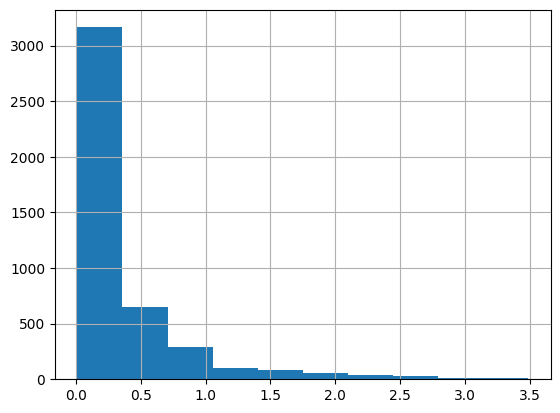

In [18]:
y_train.hist()
plt.show()

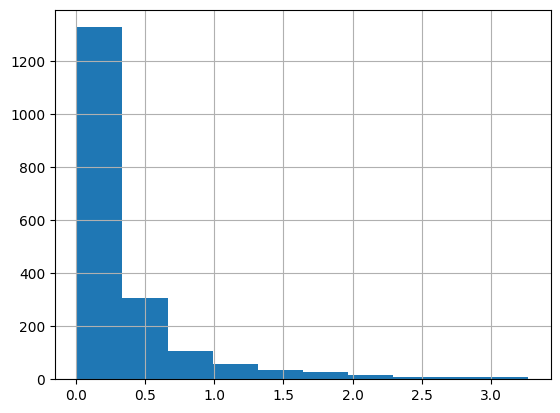

In [19]:
y_test.hist()
plt.show()

#CHUNK 4:
###Simple Regression

###Helper Function

In [20]:
def helper(predictor,x_train):
  model = stats.linregress(x_train[predictor], y_train)
  print("r2_value:", model.rvalue**2)
  print("p_value:", model.pvalue)
  print("slope:", model.slope)

  plt.plot(x_train[predictor], y_train, 'o', label='original data')
  plt.plot(x_train[predictor], model.intercept + model.slope*x_train[predictor], 'r', label='fitted line')
  plt.legend()
  plt.title(f'regression NA Sales & {predictor}')
  plt.xlabel(predictor)
  plt.ylabel('NA Sales')
  plt.show()

###Regressions

r2_value: 0.12806766713778808
p_value: 2.6633335091216692e-134
slope: 0.012835914258939369


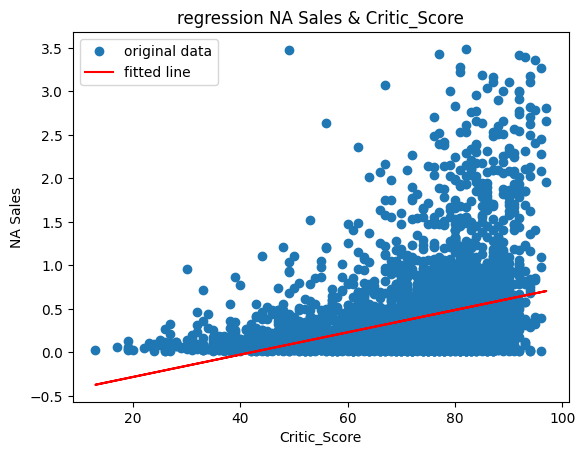

In [21]:
helper('Critic_Score',x_train)

r2_value: 0.11836780662970742
p_value: 1.2776288680703417e-123
slope: 0.009011688124294473


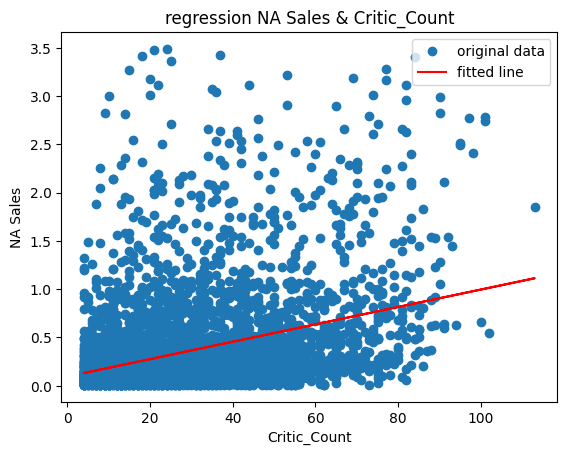

In [22]:
helper('Critic_Count', x_train)

r2_value: 0.02151531964042101
p_value: 8.754490327132212e-23
slope: 0.005055320235831348


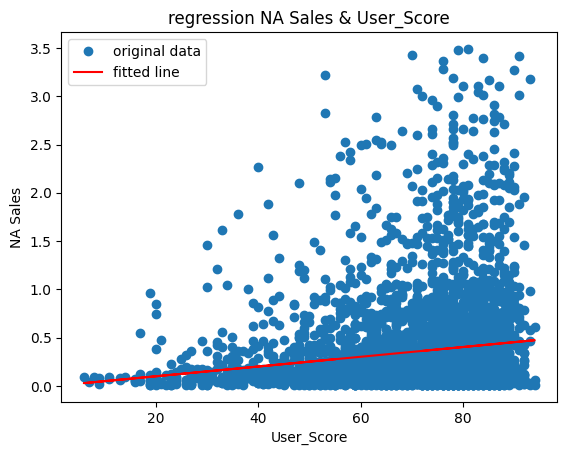

In [23]:
helper('User_Score', x_train)

r2_value: 0.06762592022140086
p_value: 1.4699702644427865e-69
slope: 0.0002491626987334365


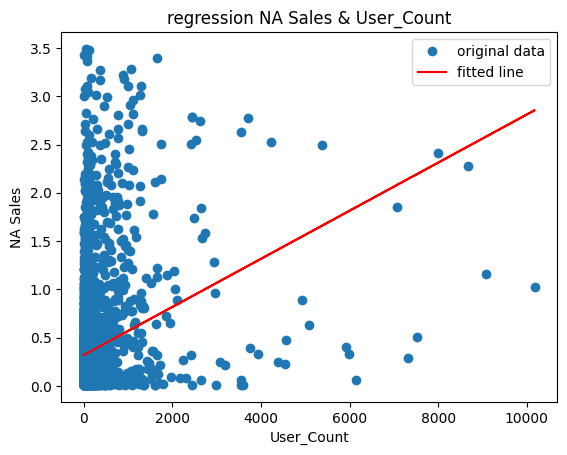

In [24]:
helper('User_Count', x_train)

###Categorical Data Regression Models

In [25]:
cat_data = pd.get_dummies(x_train[['Platform', 'Genre', 'Rating']])

r2_value: 0.0013924697148475242
p_value: 0.012885342999068452
slope: -0.1250413959917066


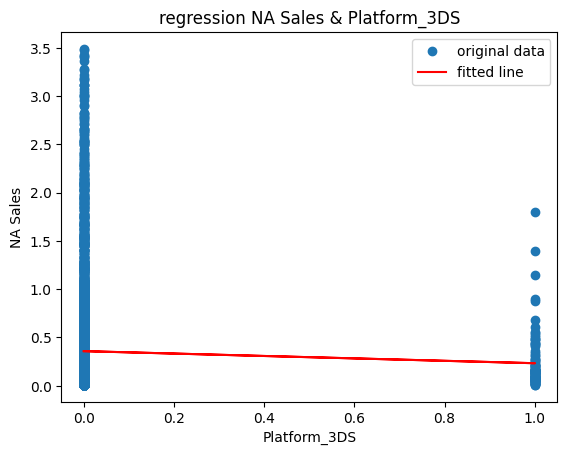

r2_value: 0.00024444642705517746
p_value: 0.297557641594195
slope: -0.02899897661747376


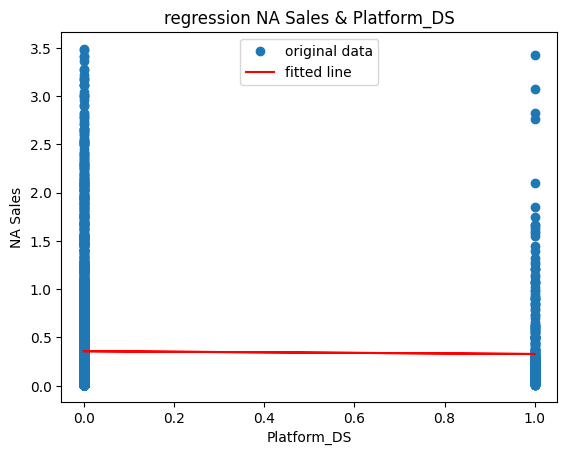

r2_value: 0.0003969230414216814
p_value: 0.18436370896171916
slope: -0.05267381696050873


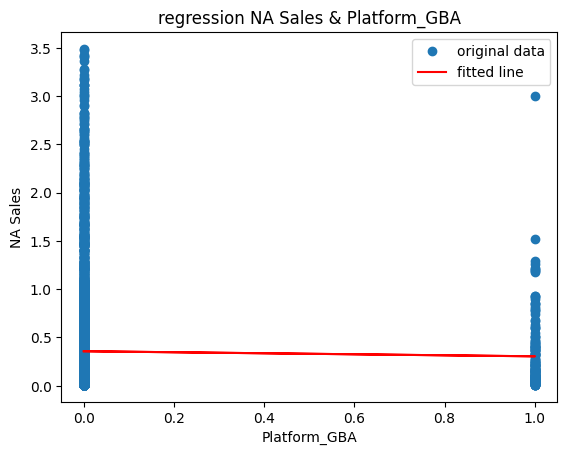

r2_value: 0.0020781580122063875
p_value: 0.0023762669617920632
slope: -0.09777583043591476


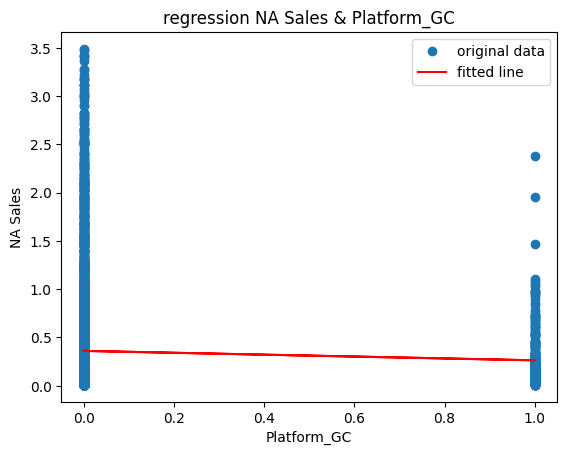

r2_value: 0.005453369995563288
p_value: 8.368859901184737e-07
slope: -0.1699219651232769


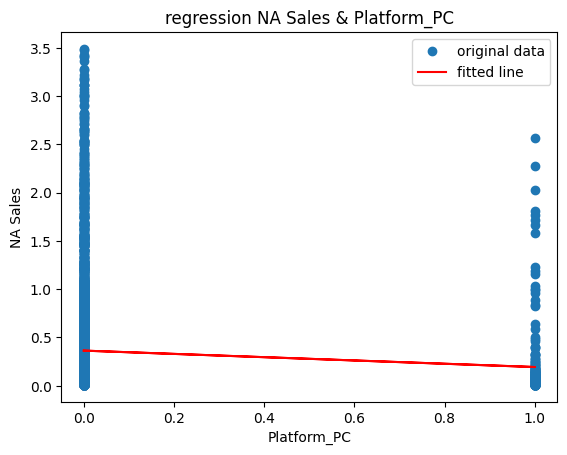

r2_value: 0.005142629121720321
p_value: 1.7203763129881208e-06
slope: 0.230404499902581


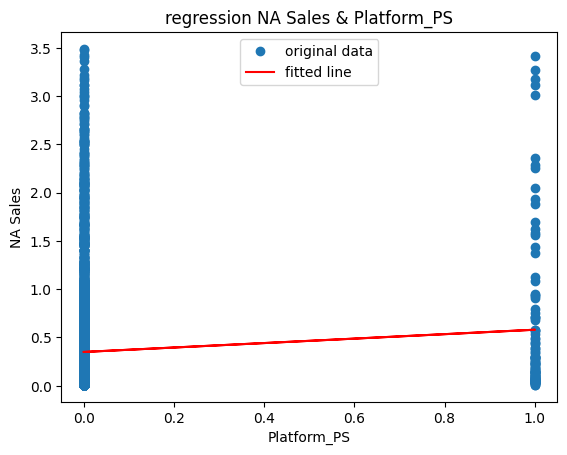

r2_value: 0.0002815578046659111
p_value: 0.2635772524681982
slope: 0.021780889111966514


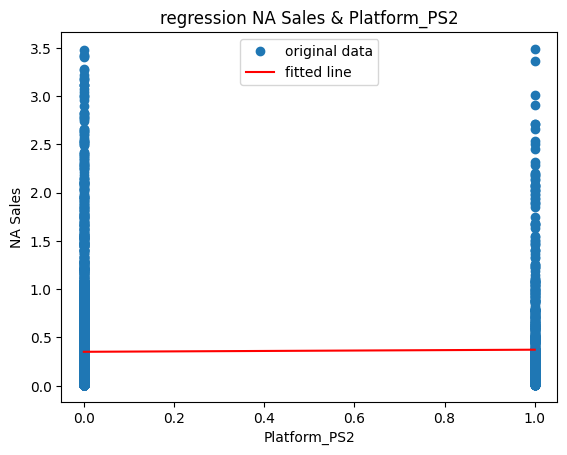

r2_value: 0.0010645612304675542
p_value: 0.02968275998377476
slope: 0.0507454056049834


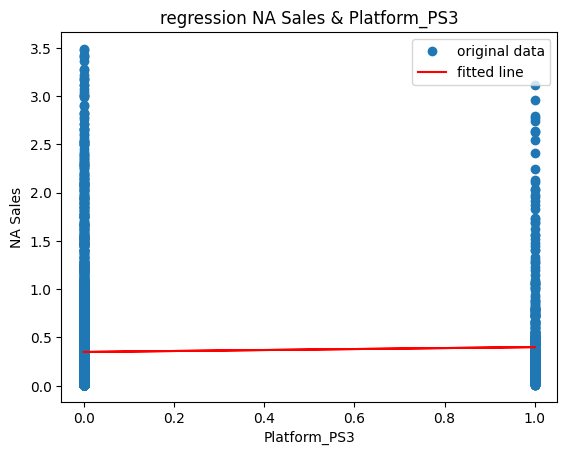

r2_value: 0.0003197282310567532
p_value: 0.23351195429520188
slope: 0.050526408041175586


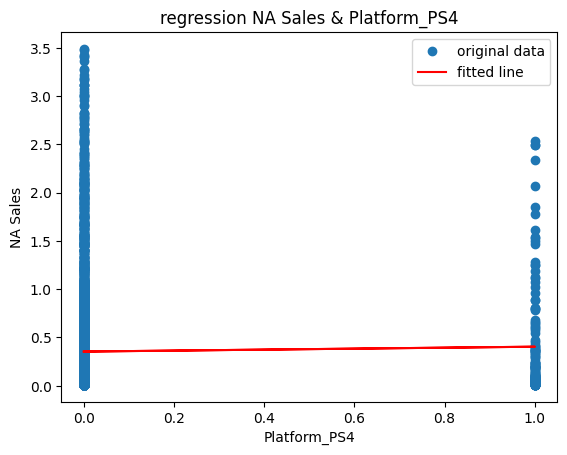

r2_value: 0.0048802927936308785
p_value: 3.1643862469783273e-06
slope: -0.14661404792886604


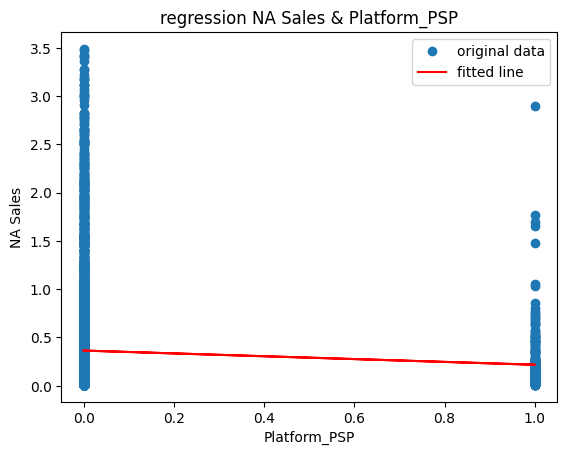

r2_value: 0.002633291095851223
p_value: 0.0006239006705701915
slope: -0.237148728464518


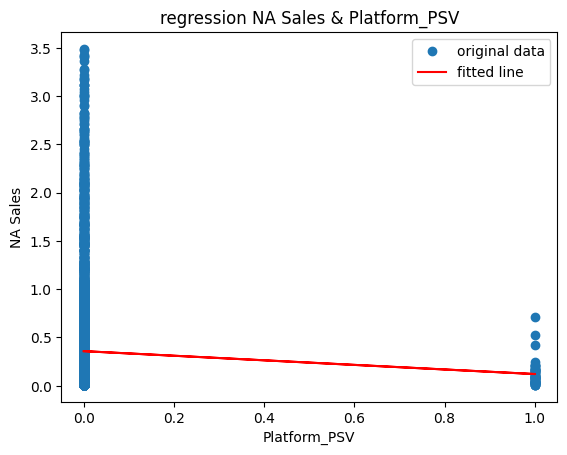

r2_value: 0.0006587061645754297
p_value: 0.08723718392273346
slope: 0.049131187251618955


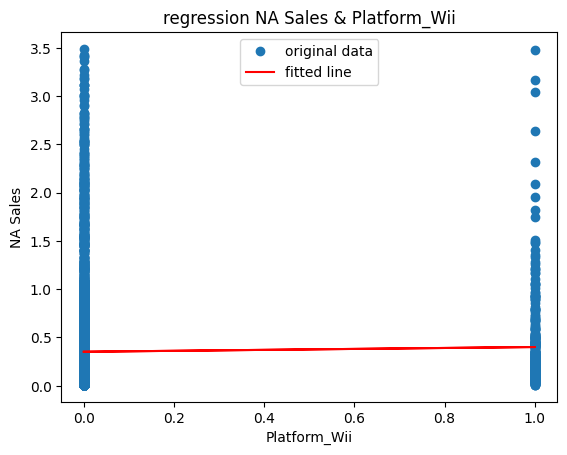

r2_value: 3.723505601564055e-05
p_value: 0.6843493939795584
slope: 0.026719732194135506


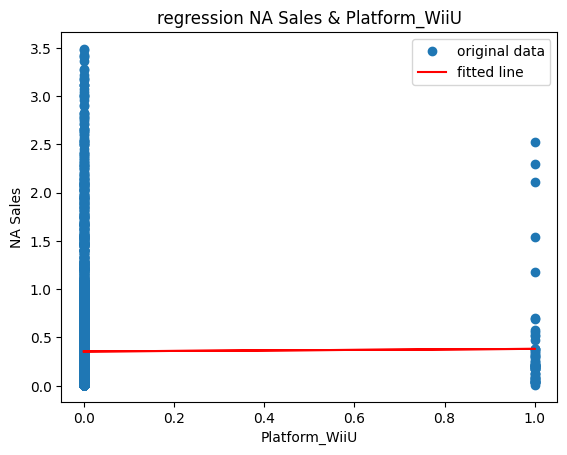

r2_value: 0.009339267449625398
p_value: 1.0932612819311157e-10
slope: 0.1412431371895954


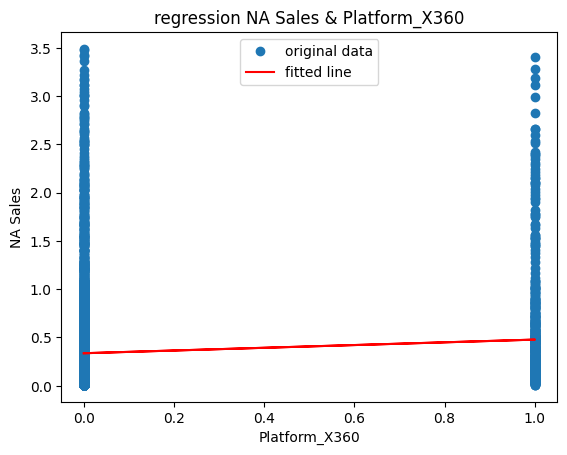

r2_value: 0.00433361691691591
p_value: 1.1308627656431197e-05
slope: -0.11405941325804723


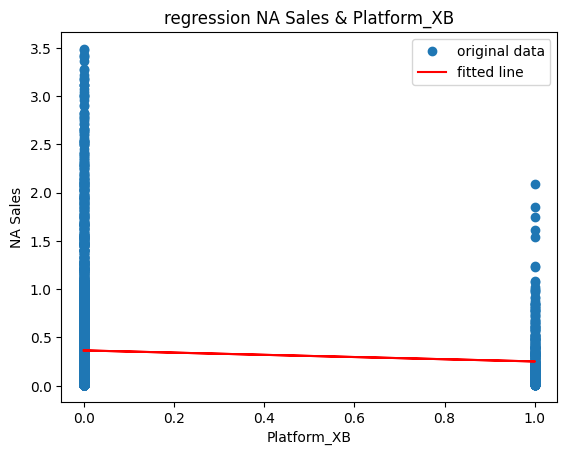

r2_value: 0.00380031380556128
p_value: 3.940518983247666e-05
slope: 0.19631799929259477


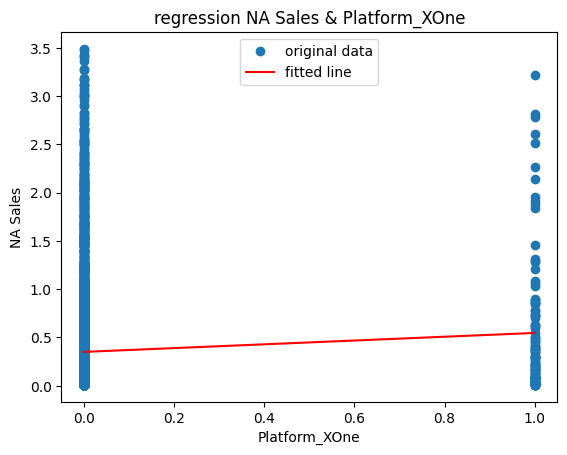

r2_value: 0.00021721042662062613
p_value: 0.3261326586661295
slope: -0.01694223412705942


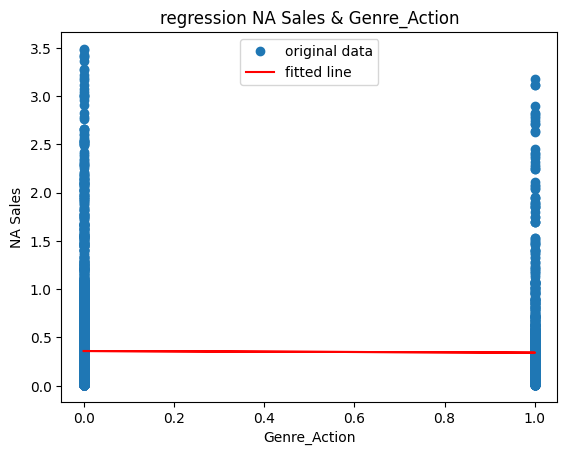

r2_value: 0.0032565823604382223
p_value: 0.00014181146012000713
slope: -0.16292744883591018


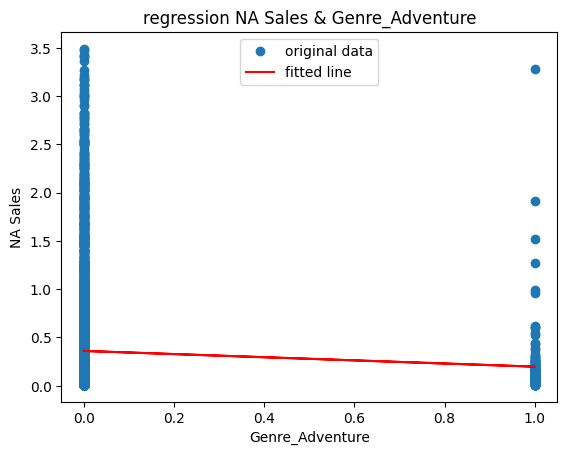

r2_value: 4.151173341308651e-07
p_value: 0.9657618487402485
slope: 0.001376802225907086


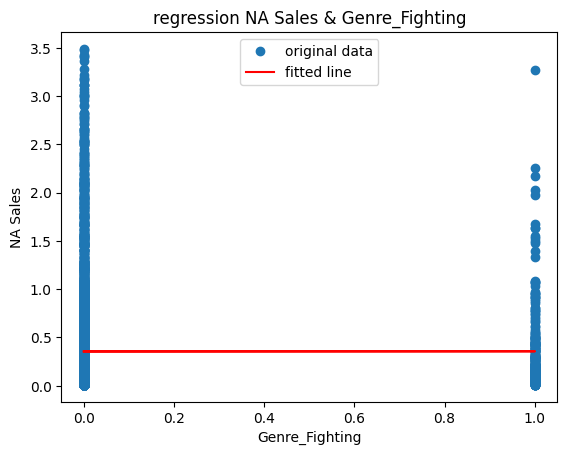

r2_value: 0.00330826910938014
p_value: 0.000125506321148918
slope: 0.11904497374027154


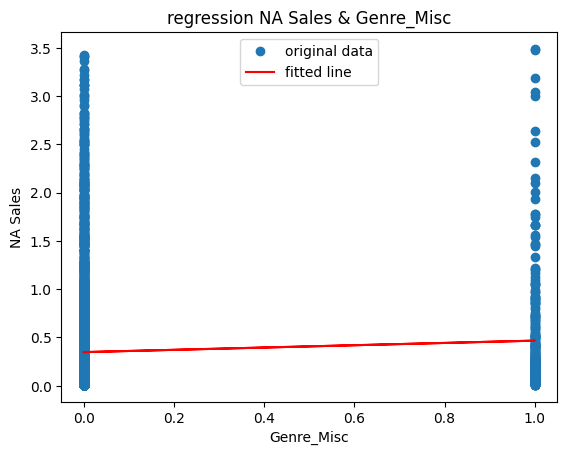

r2_value: 4.455921344350116e-05
p_value: 0.6565183775122834
slope: 0.013792327270752592


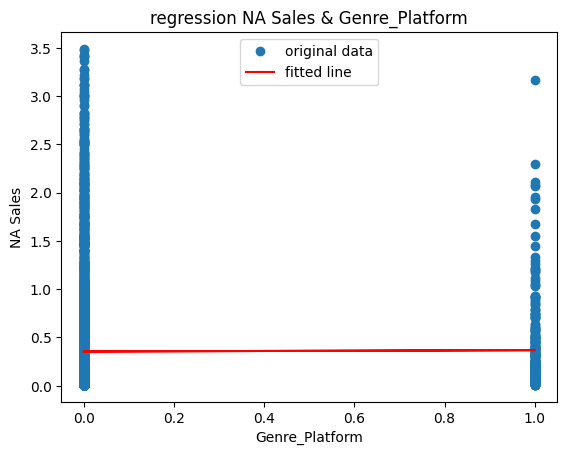

r2_value: 0.000291941048368809
p_value: 0.25495074845217114
slope: -0.06272212300325684


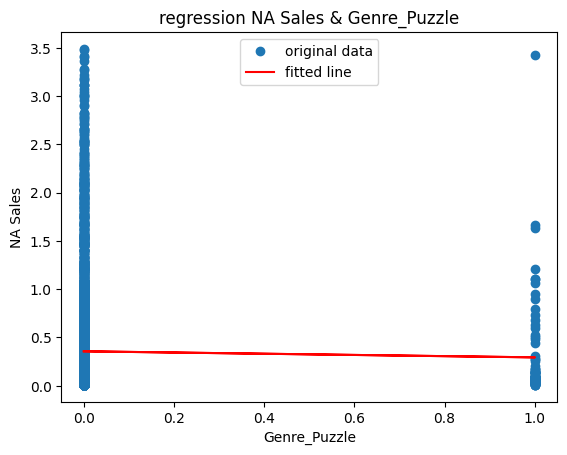

r2_value: 0.0009232627638893911
p_value: 0.042888420432525415
slope: -0.054794551073346055


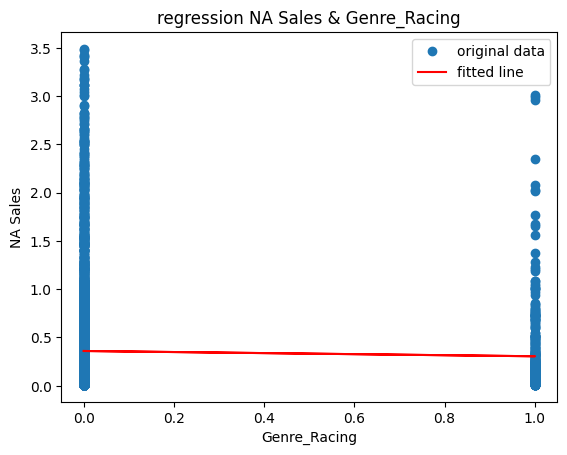

r2_value: 0.0006523339167077702
p_value: 0.0887815355284394
slope: -0.04237088634610776


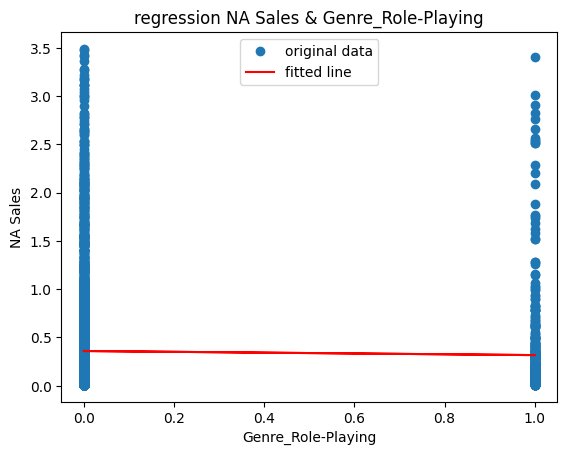

r2_value: 0.0009276957629033114
p_value: 0.042391885718471384
slope: 0.04596705217167842


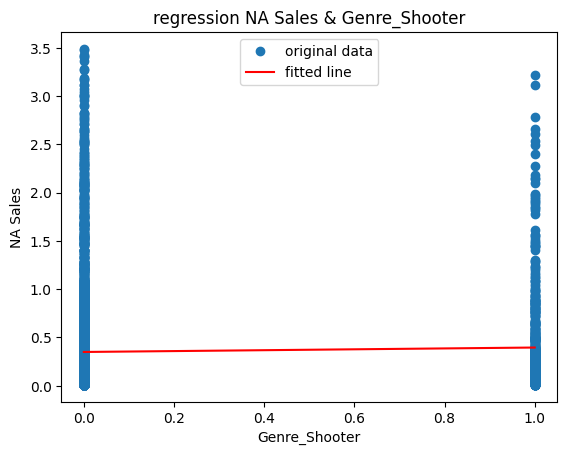

r2_value: 2.090409131906264e-05
p_value: 0.7606675444778414
slope: 0.011714817538500349


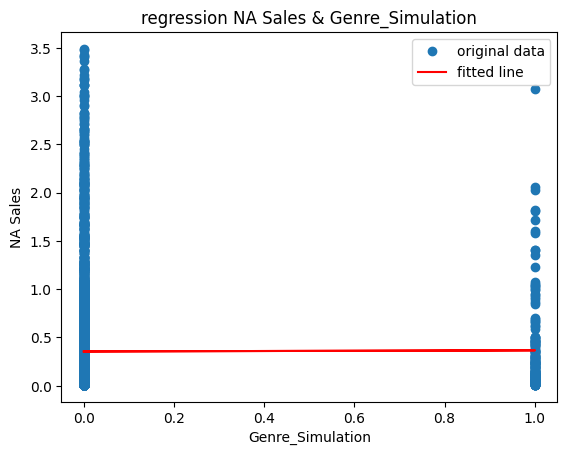

r2_value: 0.002765684512535642
p_value: 0.00045478274154317825
slope: 0.07373033232116734


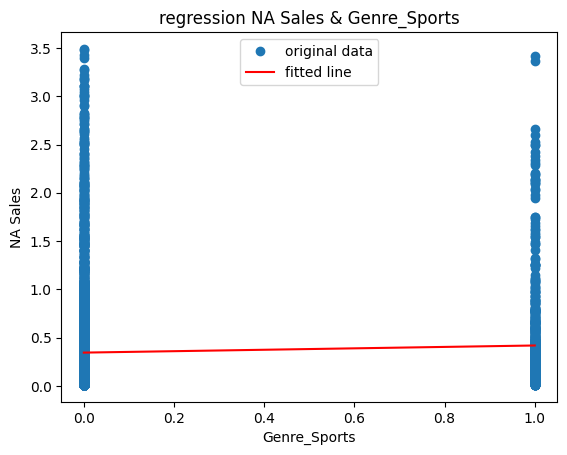

r2_value: 0.0041479257534451225
p_value: 1.7452538286300765e-05
slope: -0.1966693832262013


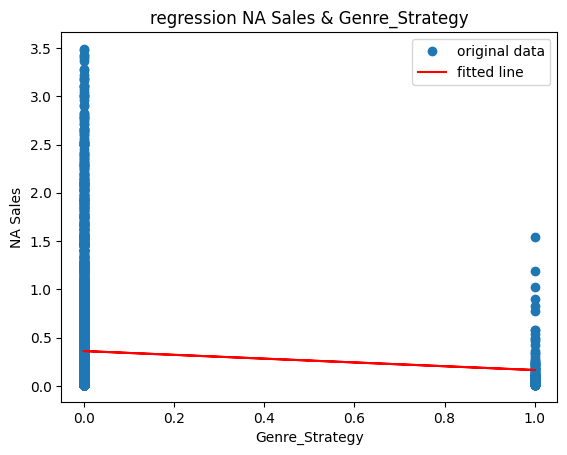

r2_value: 0.0015303100869795804
p_value: 0.00912864285616481
slope: 0.04188988712766002


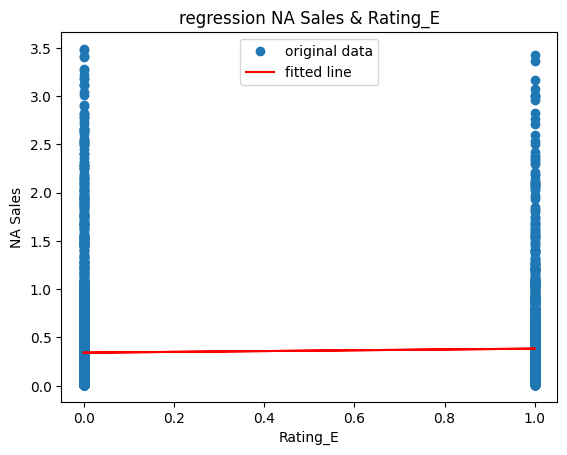

r2_value: 0.0011494473002863499
p_value: 0.02386033051041554
slope: -0.048565776633838854


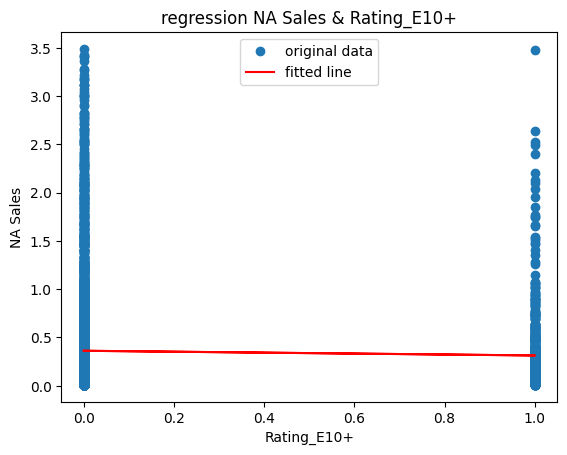

r2_value: 0.002866506975897081
p_value: 0.00035767630161097764
slope: 0.06651888636386688


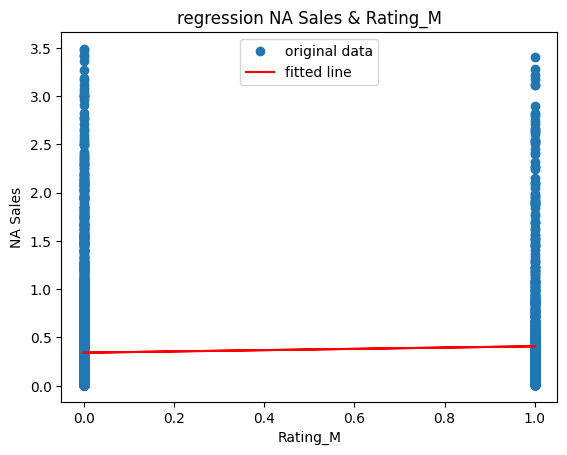

r2_value: 0.0031296541142626613
p_value: 0.00019149477593854595
slope: -0.05859757247702833


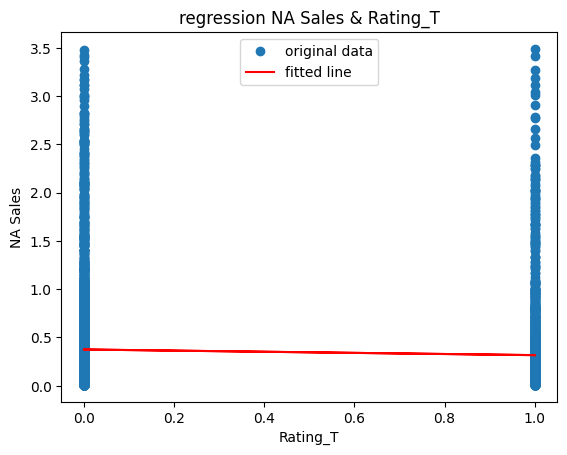

r2_value: 0.0005952966072290647
p_value: 0.10400627028374468
slope: -0.23365714608263696


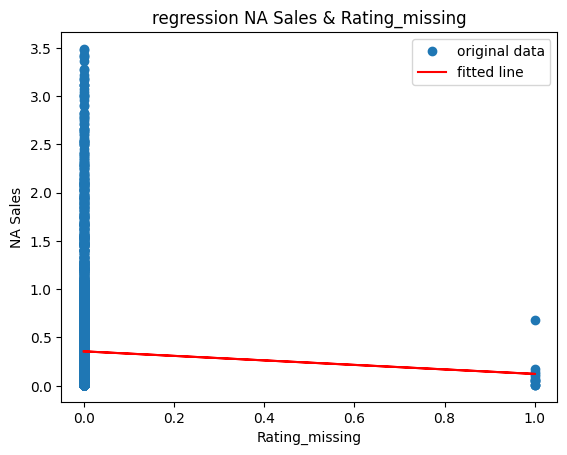

In [26]:
for col in cat_data.columns:
  helper(col, cat_data)

#CHUNK 5:
###Improving Model Fit

In [27]:
new_x = x_train.copy()
new_x['New_User_Count'] = new_x['User_Count']**0.07

r2_value: 0.06762592022140086
p_value: 1.4699702644427865e-69
slope: 0.0002491626987334365


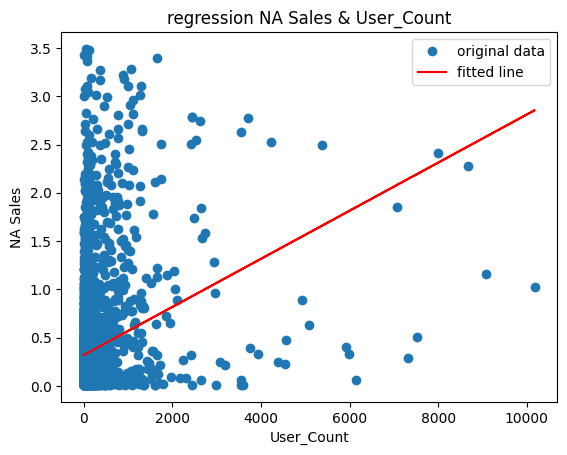

In [28]:
helper('User_Count', new_x)

r2_value: 0.17614629332227966
p_value: 4.832558063411464e-189
slope: 1.4782529991667381


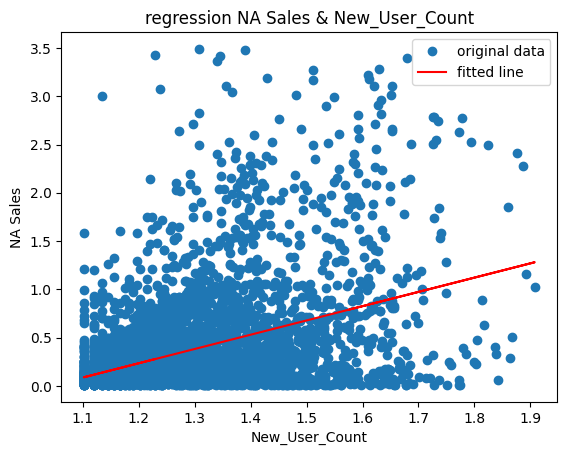

In [29]:
helper('New_User_Count', new_x)

By looking at the r squared value in the new regression model, we can see that this transformation of the data has increased the predict power from this specific model. So we have better fit the data for the model.

#Exporting

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
!cp "/content/drive/MyDrive/Colab Notebooks/A5_Moore_Devan.ipynb" ./
!jupyter nbconvert --to html "A5_Moore_Devan.ipynb"

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/A5_Moore_Devan.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern 'A5_Moore_Devan.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answe